In [1]:
import os 
import pandas as pd
import numpy as np
os.getcwd()


'/Users/gavin'

In [2]:
os.chdir('/Users/gavin/Desktop/marketing analytics/final_customer_segmentation')

In [3]:
sb = pd.read_csv('subscribers.csv')

In [4]:
sb.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,join_fee,language,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,NaN,ar,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,0.3303,ar,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,0.1101,ar,NaN,14,False,0,NaN,NaN,NaN,True
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,0.0367,ar,NaN,14,False,0,NaN,NaN,NaN,True
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,0.0367,ar,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True


In [5]:
categorical_features = sb['package_type']
categorical_features.unique()

array(['economy', 'base', 'enhanced', nan], dtype=object)

In [6]:
sb['account_creation_date']=pd.to_datetime(sb['account_creation_date'], format='%Y-%m-%d %H:%M')
sb['account_creation_month'] = pd.DatetimeIndex(sb['account_creation_date']).month
sb['account_creation_hour'] = pd.DatetimeIndex(sb['account_creation_date']).hour
sb= sb.drop(['account_creation_date'],axis=1)
sb.head()

,Unnamed: 0,subid,package_type,num_weekly_services_utilized,preferred_genre,intended_use,weekly_consumption_hour,num_ideal_streaming_services,age,male_TF,...,payment_type,num_trial_days,current_sub_TF,payment_period,last_payment,next_payment,cancel_date,trial_completed,account_creation_month,account_creation_hour
0,162502,21724479,economy,NaN,comedy,access to exclusive content,NaN,NaN,NaN,False,...,Standard Charter,14,True,1,2020-02-07 21:44:16,2020-06-07 21:44:16,NaN,True,1,21
1,380374,23383224,base,NaN,comedy,access to exclusive content,22.951579,NaN,70.0,False,...,NaN,14,True,1,2020-03-15 15:44:35,2020-07-15 15:44:35,NaN,True,3,15
2,496617,26844789,enhanced,3.0,regional,replace OTT,36.001186,2.0,25.0,True,...,NaN,14,False,0,NaN,NaN,NaN,True,12,16
3,356799,29417030,base,NaN,drama,replace OTT,20.051667,NaN,30.0,False,...,NaN,14,False,0,NaN,NaN,NaN,True,1,16
4,681701,26723159,base,4.0,comedy,replace OTT,22.951579,3.0,28.0,False,...,NaN,14,True,2,2020-02-19 12:57:07,2020-06-19 12:57:07,NaN,True,10,12


# data preprocessing

In [7]:
sb= sb.drop(['Unnamed: 0','cancel_date',
              'last_payment',
              'next_payment','language',
              'payment_type','num_trial_days', 'trial_end_date','plan_type',
              'months_per_bill_period', 'country','monthly_price','discount_price','trial_completed'],axis=1)

In [8]:
sb.drop(sb[sb.join_fee < 0].index, inplace=True)
sb.drop(sb[sb.age>100].index,inplace=True)

In [9]:
sb["num_weekly_services_utilized"].fillna(value=0, inplace = True) 
sb["weekly_consumption_hour"].fillna(value=0, inplace = True) 
sb["num_ideal_streaming_services"].fillna(value=0, inplace = True)
sb.dropna(subset=['age'],inplace=True)
sb.dropna(subset=['join_fee'],inplace=True)
sb.dropna(inplace=True)

In [10]:
sb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143864 entries, 2 to 227627
Data columns (total 18 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   subid                         143864 non-null  int64  
 1   package_type                  143864 non-null  object 
 2   num_weekly_services_utilized  143864 non-null  float64
 3   preferred_genre               143864 non-null  object 
 4   intended_use                  143864 non-null  object 
 5   weekly_consumption_hour       143864 non-null  float64
 6   num_ideal_streaming_services  143864 non-null  float64
 7   age                           143864 non-null  float64
 8   male_TF                       143864 non-null  object 
 9   attribution_technical         143864 non-null  object 
 10  attribution_survey            143864 non-null  object 
 11  op_sys                        143864 non-null  object 
 12  initial_credit_card_declined  143864 non-nul

In [11]:
sbbbb_orginal = sb.copy()

In [12]:
sb=pd.get_dummies(sb, columns=['package_type','num_weekly_services_utilized', 
                                 'preferred_genre','intended_use','num_ideal_streaming_services',
                                 'attribution_technical','attribution_survey','op_sys',
                                 'join_fee'],drop_first=True)


# Normalize

In [13]:
import pandas as pd
from sklearn import preprocessing
  
x = sb.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
sb = pd.DataFrame(x_scaled)

In [14]:
sse={}

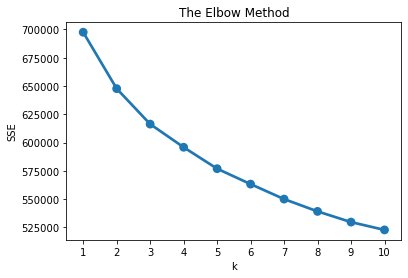

In [15]:
from sklearn. cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
for k in range(1, 11):
  
    # Initialize KMeans with k clusters and fit it 
    kmeans = KMeans(n_clusters=k, random_state=1).fit(sb)
    
    # Assign sum of squared distances to k element of the sse dictionary
    sse[k] = kmeans.inertia_ 

# Add the plot title, x and y axis labels
plt.title('The Elbow Method'); plt.xlabel('k'); plt.ylabel('SSE')

# Plot SSE values for each k stored as keys in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

In [16]:
#choosing 3 cluster

In [17]:
# Import KMeans 
from sklearn.cluster import KMeans

# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(sb)

# Extract cluster labels
cluster_labels = kmeans.labels_

In [18]:
cluster_labels

array([1, 2, 2, ..., 2, 0, 2], dtype=int32)

In [19]:
sbbbb_orginal['prediction'] = pd.Series(cluster_labels,index=sbbbb_orginal.index)

In [20]:
sbbbb_orginal.to_csv('/Users/gavin/Desktop/marketing analytics/final_customer_segmentation/export.csv',sep=",",index=True,header=True)